In [31]:
import pandas as pd 
import requests
import matplotlib.pyplot as plt


In [32]:
df_17 = pd.read_csv("FIFA17_official_data.csv")
df_18 = pd.read_csv("FIFA18_official_data.csv")


df_17["Year"] = 2017
df_18["Year"] = 2018
df_18.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,Year
0,176580,L. Suárez,30,https://cdn.sofifa.com/players/176/580/18_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,92,92,FC Barcelona,https://cdn.sofifa.com/teams/241/light_30.png,...,38.0,27.0,25.0,31.0,33.0,37.0,CF,88.0,€198.9M,2018
1,178518,R. Nainggolan,29,https://cdn.sofifa.com/players/178/518/18_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,86,86,Roma,https://cdn.sofifa.com/teams/52/light_30.png,...,88.0,11.0,11.0,14.0,8.0,11.0,CDM,84.0,€72.3M,2018
2,203551,A. Florenzi,26,https://cdn.sofifa.com/players/203/551/18_60.png,Italy,https://cdn.sofifa.com/flags/it.png,82,83,Roma,https://cdn.sofifa.com/teams/52/light_30.png,...,78.0,9.0,8.0,10.0,11.0,10.0,CF,81.0,€37.3M,2018
3,197445,D. Alaba,25,https://cdn.sofifa.com/players/197/445/18_60.png,Austria,https://cdn.sofifa.com/flags/at.png,85,87,FC Bayern München,https://cdn.sofifa.com/teams/21/light_30.png,...,80.0,5.0,7.0,14.0,15.0,9.0,LB,82.0,€66.4M,2018
4,195864,P. Pogba,24,https://cdn.sofifa.com/players/195/864/18_60.png,France,https://cdn.sofifa.com/flags/fr.png,88,92,Manchester United,https://cdn.sofifa.com/teams/11/light_30.png,...,68.0,5.0,6.0,2.0,4.0,3.0,CM,85.0,€146.3M,2018


In [33]:
merged_df = pd.concat([df_17, df_18])
merged_df_clean = merged_df[["Year","ID","Name", "Age","Nationality","Overall","Potential","Club","Value","Best Position","Height","Weight","Wage","Jersey Number","Best Overall Rating","Preferred Foot"]]
merged_df_clean.head()



,Year,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Best Position,Height,Weight,Wage,Jersey Number,Best Overall Rating,Preferred Foot
0,2017,176580,L. Suárez,29,Uruguay,92,92,FC Barcelona,€83M,ST,6'0,190lbs,€525K,9.0,88.0,Right
1,2017,178518,R. Nainggolan,28,Belgium,86,86,Roma,€37.5M,CDM,5'9,143lbs,€130K,4.0,84.0,Right
2,2017,181872,A. Vidal,29,Chile,87,87,FC Bayern München,€41.5M,CDM,5'11,165lbs,€180K,23.0,85.0,Right
3,2017,197445,D. Alaba,24,Austria,86,89,FC Bayern München,€41.5M,LB,5'11,168lbs,€140K,27.0,84.0,Left
4,2017,195864,P. Pogba,23,France,88,94,Manchester United,€71.5M,CAM,6'3,185lbs,€225K,6.0,85.0,Right


In [34]:


# Remover los símbolos '€' y 'M' de la columna "Value"
merged_df_clean["Value"] = merged_df_clean["Value"].str.replace('€', '').str.replace('M', '')

# Convertir el valor a un número decimal
merged_df_clean["Value"] = pd.to_numeric(merged_df_clean["Value"], errors='coerce')

# Multiplicar el valor por 1000
merged_df_clean["Value"] = merged_df_clean["Value"] * 1000000


merged_df_clean["Wage"] = merged_df_clean["Wage"].str.replace('€', '').str.replace('K', '')

merged_df_clean["Wage"] = pd.to_numeric(merged_df_clean["Wage"], errors='coerce')

merged_df_clean["Wage"] = merged_df_clean["Wage"] * 1000

merged_df_clean["Weight"] = merged_df_clean["Weight"].str.removesuffix("lbs")


merged_df_clean.head()




C:\Users\Fer\AppData\Local\Temp\ipykernel_23272\1559060054.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_clean["Value"] = merged_df_clean["Value"].str.replace('€', '').str.replace('M', '')
C:\Users\Fer\AppData\Local\Temp\ipykernel_23272\1559060054.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_clean["Value"] = pd.to_numeric(merged_df_clean["Value"], errors='coerce')
C:\Users\Fer\AppData\Local\Temp\ipykernel_23272\1559060054.py:8: SettingWithCopyWarning: 
A value is trying to b

,Year,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Best Position,Height,Weight,Wage,Jersey Number,Best Overall Rating,Preferred Foot
0,2017,176580,L. Suárez,29,Uruguay,92,92,FC Barcelona,83000000.0,ST,6'0,190,525000,9.0,88.0,Right
1,2017,178518,R. Nainggolan,28,Belgium,86,86,Roma,37500000.0,CDM,5'9,143,130000,4.0,84.0,Right
2,2017,181872,A. Vidal,29,Chile,87,87,FC Bayern München,41500000.0,CDM,5'11,165,180000,23.0,85.0,Right
3,2017,197445,D. Alaba,24,Austria,86,89,FC Bayern München,41500000.0,LB,5'11,168,140000,27.0,84.0,Left
4,2017,195864,P. Pogba,23,France,88,94,Manchester United,71500000.0,CAM,6'3,185,225000,6.0,85.0,Right


In [35]:

merged_df_clean["Club"].fillna("Free Agent",inplace=True)
merged_df_clean.fillna(0)   

merged_df_clean["Club"].info() 


<class 'pandas.core.series.Series'>
Int64Index: 35487 entries, 0 to 17926
Series name: Club
Non-Null Count  Dtype 
--------------  ----- 
35487 non-null  object
dtypes: object(1)
memory usage: 554.5+ KB


C:\Users\Fer\AppData\Local\Temp\ipykernel_23272\3261111024.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_clean["Club"].fillna("Free Agent",inplace=True)


In [36]:
merged_df_clean.to_csv("Merged_Table.csv", index=False)

PermissionError: [Errno 13] Permission denied: 'Merged_Table.csv'

Año 2017: Número de Jersey más Común = 7.0
Año 2018: Número de Jersey más Común = 6.0


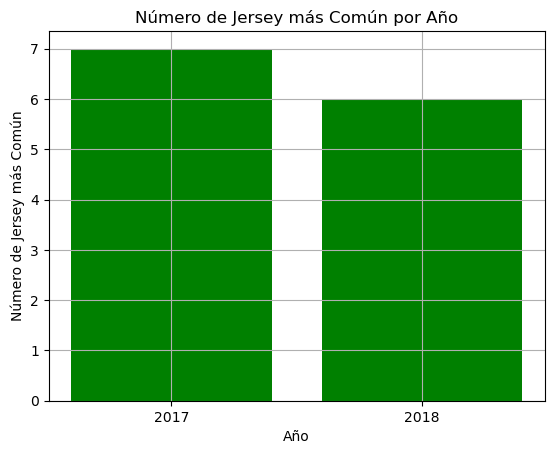

In [ ]:


# Leer el archivo CSV limpio
merged_df_clean = pd.read_csv("Merged_Table.csv")

# Encontrar el número más común de jersey por cada año
most_common_jersey_per_year = merged_df_clean.groupby("Year")["Jersey Number"].agg(lambda x: x.mode().iat[0])


# Imprimir el resultado del número de jersey más común por año
for year, jersey_number in most_common_jersey_per_year.items():
    print(f"Año {year}: Número de Jersey más Común = {jersey_number}")

# Crear una gráfica de barras
plt.bar(most_common_jersey_per_year.index, most_common_jersey_per_year.values,color="green")

# Personalizar la gráfica
plt.xlabel("Año")
plt.ylabel("Número de Jersey más Común")
plt.title("Número de Jersey más Común por Año")
plt.xticks(most_common_jersey_per_year.index)
plt.grid(True)

# Mostrar la gráfica
plt.show()


In [ ]:
import pandas as pd

# Leer el archivo CSV limpio
merged_df_clean = pd.read_csv("Merged_Table.csv")

# Filtrar los datos que tengan un valor diferente de cero en las columnas "Value" y "Wage",
# y que sean diferentes de NaN en la columna "Jersey Number"
merged_df_filtered = merged_df_clean[(merged_df_clean['Value'] != 0) & 
                                     (merged_df_clean['Wage'] != 0) & 
                                     (~merged_df_clean['Jersey Number'].isnull())]

# Convertir la columna "Jersey Number" y "Best Overall Rating" a tipo numérico
merged_df_filtered['Jersey Number'] = pd.to_numeric(merged_df_filtered['Jersey Number'], errors='coerce')
merged_df_filtered['Best Overall Rating'] = pd.to_numeric(merged_df_filtered['Best Overall Rating'], errors='coerce')

# Calcular el coeficiente de correlación entre el número de playera y los goles (Best Overall Rating)
correlation = merged_df_filtered['Jersey Number'].corr(merged_df_filtered['Best Overall Rating'])

# Imprimir el resultado
print(f"\nCoeficiente de Correlación entre Número de Playera y Goles (Best Overall Rating): {correlation}")



Coeficiente de Correlación entre Número de Playera y Goles (Best Overall Rating): -0.20783814100432885


C:\Users\Fer\AppData\Local\Temp\ipykernel_5204\2805813835.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_filtered['Jersey Number'] = pd.to_numeric(merged_df_filtered['Jersey Number'], errors='coerce')
C:\Users\Fer\AppData\Local\Temp\ipykernel_5204\2805813835.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_filtered['Best Overall Rating'] = pd.to_numeric(merged_df_filtered['Best Overall Rating'], errors='coerce')


C:\Users\Fer\AppData\Local\Temp\ipykernel_5204\2837793136.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_filtered['Jersey Number'] = pd.to_numeric(merged_df_filtered['Jersey Number'], errors='coerce')
C:\Users\Fer\AppData\Local\Temp\ipykernel_5204\2837793136.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_filtered['Best Overall Rating'] = pd.to_numeric(merged_df_filtered['Best Overall Rating'], errors='coerce')


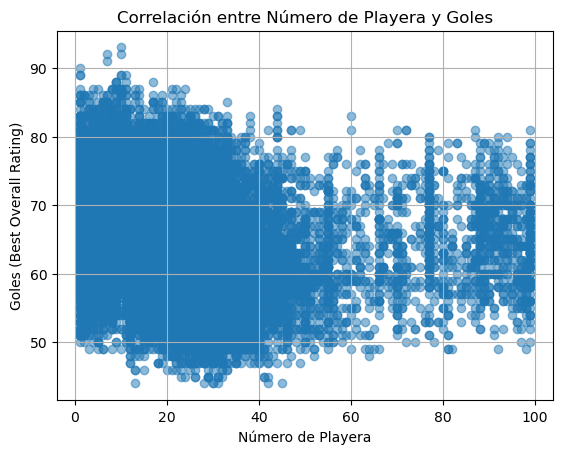

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo CSV limpio
merged_df_clean = pd.read_csv("Merged_Table.csv")

# Filtrar los datos que tengan un valor diferente de cero en las columnas "Value" y "Wage",
# y que sean diferentes de NaN en la columna "Jersey Number"
merged_df_filtered = merged_df_clean[(merged_df_clean['Value'] != 0) & 
                                     (merged_df_clean['Wage'] != 0) & 
                                     (~merged_df_clean['Jersey Number'].isnull())]

# Convertir la columna "Jersey Number" y "Best Overall Rating" a tipo numérico
merged_df_filtered['Jersey Number'] = pd.to_numeric(merged_df_filtered['Jersey Number'], errors='coerce')
merged_df_filtered['Best Overall Rating'] = pd.to_numeric(merged_df_filtered['Best Overall Rating'], errors='coerce')

# Crear la gráfica de dispersión
plt.scatter(merged_df_filtered['Jersey Number'], merged_df_filtered['Best Overall Rating'], alpha=0.5)

# Configurar los ejes y etiquetas
plt.xlabel('Número de Playera')
plt.ylabel('Goles (Best Overall Rating)')
plt.title('Correlación entre Número de Playera y Goles')
plt.grid(True)

# Mostrar la gráfica
plt.show()


In [ ]:
# Paso 1: Contar la cantidad de jugadores por país
players_by_country = merged_df_clean["Nationality"].value_counts()

# Paso 2: Obtener el Top 5 países con más jugadores
top_5_countries = players_by_country.head(5)

print("Top 5 países con más jugadores:")
print(top_5_countries)


Top 5 países con más jugadores:
England      3273
Argentina    2078
Spain        2038
France       1942
Germany      1851
Name: Nationality, dtype: int64


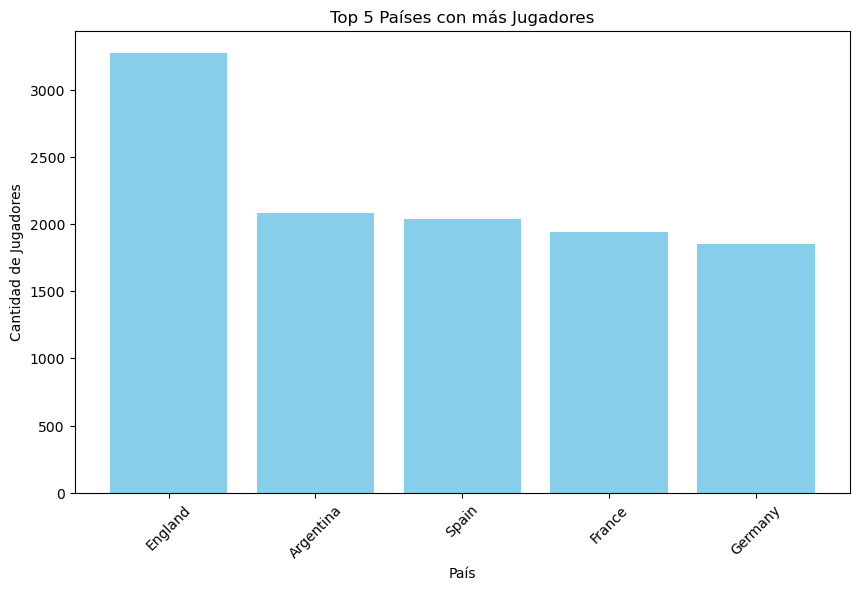

In [ ]:
import matplotlib.pyplot as plt

# Paso 1: Contar la cantidad de jugadores por país
players_by_country = merged_df_clean["Nationality"].value_counts()

# Paso 2: Obtener el Top 5 países con más jugadores
top_5_countries = players_by_country.head(5)

# Paso 3: Crear la gráfica de barras
plt.figure(figsize=(10, 6))
plt.bar(top_5_countries.index, top_5_countries.values, color='skyblue')
plt.xlabel('País')
plt.ylabel('Cantidad de Jugadores')
plt.title('Top 5 Países con más Jugadores')
plt.xticks(rotation=45)

# Paso 4: Mostrar la gráfica
plt.show()


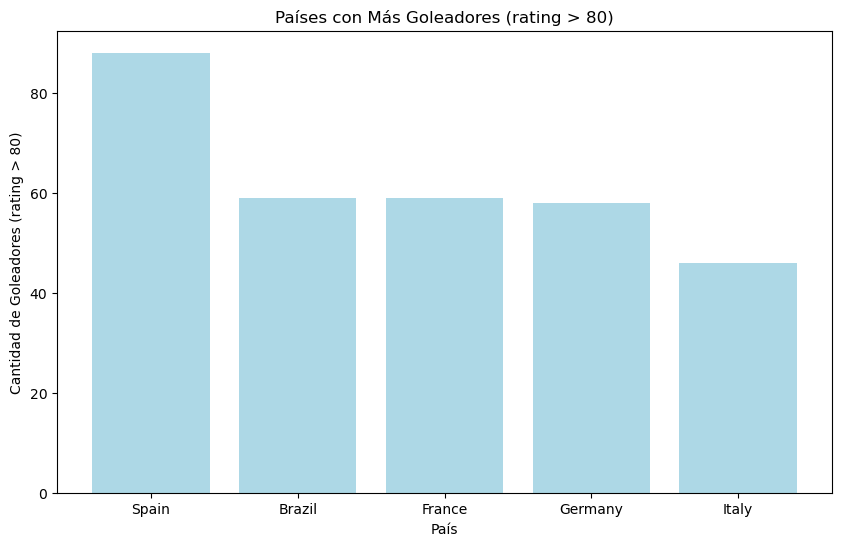

In [37]:
import matplotlib.pyplot as plt

# Filtrar los jugadores que tienen goles y agrupar por nacionalidad
top_scorers_by_country = merged_df_clean[merged_df_clean['Best Overall Rating'] > 80].groupby('Nationality')['Name'].count().nlargest(5)
top_scorers_by_country
# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
plt.bar(top_scorers_by_country.index, top_scorers_by_country.values, color='lightblue')
plt.xlabel('País')
plt.ylabel('Cantidad de Goleadores (rating > 80)')
plt.title('Países con Más Goleadores (rating > 80)')

# Mostrar la gráfica
plt.show()


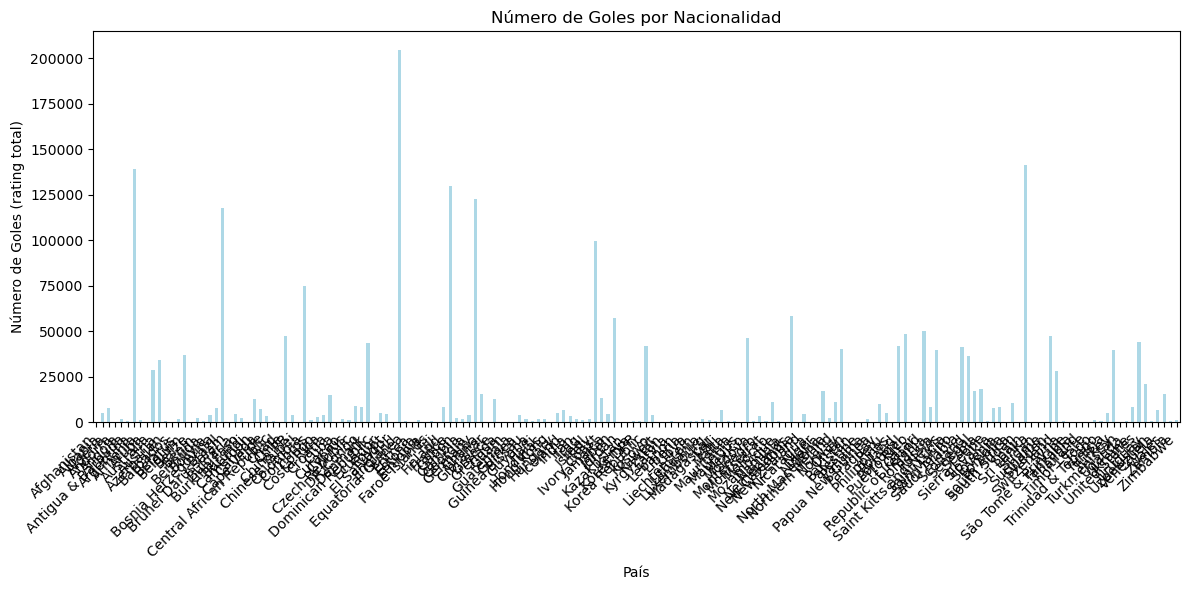

In [ ]:
import matplotlib.pyplot as plt

# Agrupar los datos por nacionalidad y calcular la suma de goles para cada país
goals_by_country = merged_df_clean.groupby('Nationality')['Best Overall Rating'].sum()

# Crear un gráfico de barras para visualizar el número de goles por país
plt.figure(figsize=(12, 6))
goals_by_country.plot(kind='bar', color='lightblue')
plt.xlabel('País')
plt.ylabel('Número de Goles (rating total)')
plt.title('Número de Goles por Nacionalidad')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar la gráfica
plt.show()


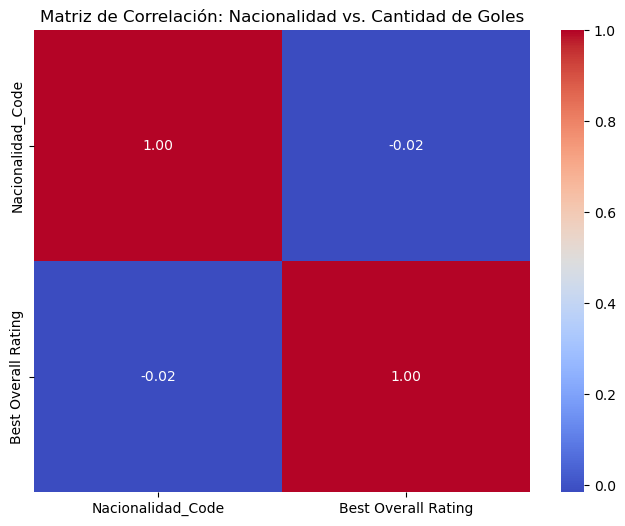

In [ ]:
import pandas as pd
import seaborn as sns

# Crear una copia del DataFrame para evitar modificar el original
df_corr = merged_df_clean.copy()

# Codificar la columna "Nacionalidad" en valores numéricos
df_corr['Nacionalidad_Code'] = pd.Categorical(df_corr['Nationality']).codes

# Calcular la correlación entre la nacionalidad codificada y la cantidad de goles
correlation = df_corr[['Nacionalidad_Code', 'Best Overall Rating']].corr()

# Visualizar la matriz de correlación utilizando un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación: Nacionalidad vs. Cantidad de Goles')
plt.show()


In [ ]:
print("Correlación entre Nacionalidad y Cantidad de Goles:")
print(correlation['Nacionalidad_Code']['Best Overall Rating'])


Correlación entre Nacionalidad y Cantidad de Goles:
-0.0159183170039409


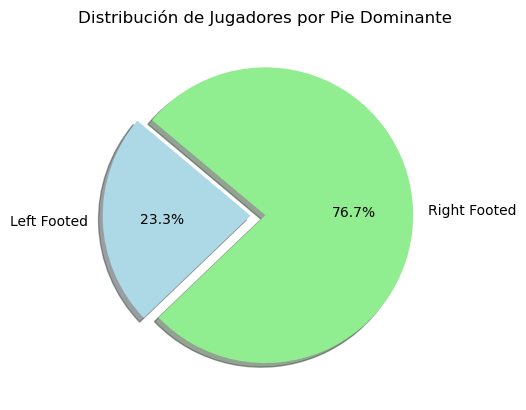

In [ ]:
import matplotlib.pyplot as plt

# Contar la cantidad de zurdos y diestros
left_footed = merged_df_clean[merged_df_clean['Preferred Foot'] == 'Left']
right_footed = merged_df_clean[merged_df_clean['Preferred Foot'] == 'Right']
left_count = len(left_footed)
right_count = len(right_footed)

# Crear una lista con los datos para el gráfico
labels = ['Left Footed', 'Right Footed']
sizes = [left_count, right_count]

# Configurar las opciones del gráfico
colors = ['lightblue', 'lightgreen']
explode = (0.1, 0)  # Separar la rebanada "Left Footed" del resto del gráfico

# Crear el gráfico de pastel
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

# Agregar un título
plt.title('Distribución de Jugadores por Pie Dominante')

# Mostrar el gráfico
plt.show()


In [ ]:
groups_clubs = merged_df_clean.set_index('Club').groupby(['Club'])
best_overall_average = groups_clubs['Overall'].mean()
best_overall_total = best_overall_average.sort_values(ascending= False).head(20)
best_overall_total

Club
Juventus                   80.849057
FC Barcelona               80.148148
Napoli                     78.480000
Real Madrid                78.030303
Roma                       77.354167
Sevilla FC                 77.000000
Inter                      76.549020
Paris Saint-Germain        76.491525
Manchester United          76.215385
FC Bayern München          76.175439
Milan                      75.958333
Manchester City            75.560606
SL Benfica                 75.542373
FC Porto                   75.500000
Bayer 04 Leverkusen        75.461538
Sporting CP                75.372881
Chelsea                    75.061538
Borussia Dortmund          75.016129
Beşiktaş JK                74.924528
Athletic Club de Bilbao    74.864407
Name: Overall, dtype: float64

In [ ]:
""" PARA JUGAR CON EL GEOPIFY

import requests
import json
from pprint import pprint

# Import the API key
from api_key import geoapify_key


target_club = "FC Barcelona"
target_url = f"https://api.geoapify.com/v1/geocode/search?text={target_club}&format=json&apiKey={geoapify_key}"
print(target_url)

geo_data = requests.get(target_url).json()

# Print the json
pprint(geo_data)

"""

https://api.geoapify.com/v1/geocode/search?text=FC Barcelona&format=json&apiKey=aa6f4571352f489fa93b3b35e97b0948
{'query': {'text': 'FC Barcelona'},
 'results': [{'address_line1': 'FC Barcelona, oficial store',
              'address_line2': 'Ronda de la Universitat, 08001 Barcelona, '
                               'Spain',
              'bbox': {'lat1': 41.3873264,
                       'lat2': 41.3874264,
                       'lon1': 2.1679858,
                       'lon2': 2.1680858},
              'category': 'commercial.outdoor_and_sport',
              'city': 'Barcelona',
              'country': 'Spain',
              'country_code': 'es',
              'county': 'Barcelonès',
              'county_code': 'B',
              'datasource': {'attribution': '© OpenStreetMap contributors',
                             'license': 'Open Database License',
                             'sourcename': 'openstreetmap',
                             'url': 'https://www.openstreetmap.org

In [42]:
import requests
import json
from pprint import pprint
import hvplot.pandas
import geoviews as gv
from holoviews.element.tiles import EsriImagery

# Import the API key
from api_key import geoapify_key

# Obtener la lista de clubes únicos de merged_df_clean
# clubs = merged_df_clean['Club'].unique()

# Utilizamos la lista de clubes filtrados que ya creamos
countries = top_scorers_by_country.index

country_coordinates = []

# Iterar sobre la lista de clubes
for country in countries:
    target_url = f"https://api.geoapify.com/v1/geocode/search?text={country}&format=json&apiKey={geoapify_key}"
    print(target_url)

    geo_data = requests.get(target_url).json()

    # Verificar si la localización fue encontrada
    if 'results' in geo_data and geo_data['results']:
        # Obtener la latitud y longitud del club
        latitude = geo_data['results'][0]['lat']
        longitude = geo_data['results'][0]['lon']
        country_coordinates.append((country, latitude, longitude))
    else:
        print(f"No se encontró la localización para el país: {country}")

# Imprimir la lista de coordenadas
print(country_coordinates)
# Crear un DataFrame con las coordenadas de los clubes
df_country_coordinates = pd.DataFrame(country_coordinates, columns=['Country', 'Latitud', 'Longitud'])

# Crear el mapa con hvplot.pandas
map_plot = df_country_coordinates.hvplot.points(x='Longitud', y='Latitud', geo=True, tiles='EsriImagery', hover_cols=['Country'], size=10,color='red')

# Mostrar el mapa
gv.tile_sources.CartoLight * map_plot


https://api.geoapify.com/v1/geocode/search?text=Spain&format=json&apiKey=aa6f4571352f489fa93b3b35e97b0948
https://api.geoapify.com/v1/geocode/search?text=Brazil&format=json&apiKey=aa6f4571352f489fa93b3b35e97b0948
https://api.geoapify.com/v1/geocode/search?text=France&format=json&apiKey=aa6f4571352f489fa93b3b35e97b0948
https://api.geoapify.com/v1/geocode/search?text=Germany&format=json&apiKey=aa6f4571352f489fa93b3b35e97b0948
https://api.geoapify.com/v1/geocode/search?text=Italy&format=json&apiKey=aa6f4571352f489fa93b3b35e97b0948
[('Spain', 39.3260685, -4.8379791), ('Brazil', -10.3333333, -53.2), ('France', 46.603354, 1.8883335), ('Germany', 51.1638175, 10.4478313), ('Italy', 42.6384261, 12.674297)]


:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitud,Latitud]   (Country)